# Public Account

In [ ]:
# Modeling

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from sklearn.model_selection import train_test_split


In [17]:
df_org = pd.read_excel('dataset.xlsx')  # Load your data here

In [20]:
RAW_coulmns= 11

In [18]:
df_org.head()

,YEAR,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures,TOTALPUBLIC_ACCOUNT_RECEIPTS (B+C+D+E),GRAND_TOTAL_IIIIII_Receipts,TOTAL_Receipts (F+M),TOTALPUBLIC_ACCOUNT_DISBURSEMENTS (G+H+I+J),GRAND_TOTAL_IIIIII_Expenditures,TOTAL_Expenditures (K+P)
0,1998-01-01,77091.43,77091.43,14717.12,28198.48,50.0,39446.22,39446.22,14063.48,25298.29,50.0,120007.03,796428.64,796478.64,77556.88,796428.64,796478.64
1,1999-01-01,89854.71,29933.90,16716.89,16078.15,50.0,262062.03,13068.21,17364.15,20600.46,50.0,152583.65,1057242.21,1057292.21,312118.89,1057242.21,1057292.21
2,2000-01-01,104990.30,26097.47,22704.11,19567.10,50.0,105433.70,9171.31,20780.84,13590.01,50.0,173358.98,950446.54,950496.54,148180.91,950446.54,950496.54
3,2001-01-01,123582.65,29753.43,13390.48,23133.55,50.0,120644.53,8833.79,9590.54,24049.57,50.0,189860.11,886928.55,886978.55,163118.43,886928.55,886978.55
4,2002-01-01,125813.67,36427.97,18601.19,16259.24,50.0,127248.27,14340.00,17561.20,12760.05,50.0,197102.07,977801.40,977851.40,171909.52,977801.40,977851.40


In [ ]:
# We have to drop
ALL_derived_columns = [
    'TOTALPUBLIC_ACCOUNT_RECEIPTS',
       'GRAND_TOTAL_IIIIII_Receipts', 'TOTAL_Receipts', 'TOTALPUBLIC_ACCOUNT_DISBURSEMENTS',
       'GRAND_TOTAL_IIIIII_Expenditures', 'TOTAL_Expenditures'
]


In [23]:
# Keep only the first 11 columns (0-indexed, so 0 to 10)
df = df_org.iloc[:, :RAW_coulmns]
df.head()

,YEAR,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures
0,1998-01-01,77091.43,77091.43,14717.12,28198.48,50.0,39446.22,39446.22,14063.48,25298.29,50.0
1,1999-01-01,89854.71,29933.90,16716.89,16078.15,50.0,262062.03,13068.21,17364.15,20600.46,50.0
2,2000-01-01,104990.30,26097.47,22704.11,19567.10,50.0,105433.70,9171.31,20780.84,13590.01,50.0
3,2001-01-01,123582.65,29753.43,13390.48,23133.55,50.0,120644.53,8833.79,9590.54,24049.57,50.0
4,2002-01-01,125813.67,36427.97,18601.19,16259.24,50.0,127248.27,14340.00,17561.20,12760.05,50.0


In [24]:
# Convert the 'Year' column to datetime
# Convert the 'Year' column to datetime
df['YEAR'] = pd.to_datetime(df['YEAR'])


In [25]:
import plotly.express as px

In [26]:
# Melt the DataFrame to long format
melted_df = df.melt(id_vars=['YEAR'], var_name='Type', value_name='Amount')

In [27]:
# Create the interactive plot
fig = px.line(melted_df, x='YEAR', y='Amount', color='Type', title='Receipts and Expenditures Over the Years')
# Update the layout to position the legend at the bottom
fig.update_layout(legend_title_text='Rgions', legend=dict(orientation="h", yanchor="bottom", y=-2, xanchor="center", x=0.5))

# Show the plot
fig.show()

In [ ]:
# df.reset_index(drop=True, inplace=True)

In [28]:
# Normalize receipts and expenditures
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:].values)  # Normalize all columns except Year


In [29]:
# df.iloc[:, 1:] # jusct to check if year is dropped or not

In [30]:
# Prepare data sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [31]:
# Set sequence length (e.g., number of past years to consider)
seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

In [32]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# RNN model

In [33]:
# Build the RNN model
model_RNN = Sequential()
model_RNN.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define the input shape with Input layer
model_RNN.add(SimpleRNN(50, activation='relu'))
model_RNN.add(Dense(y_train.shape[1]))  # Output layer for each region's receipts/expenditures
model_RNN.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
# Train the model
model_RNN.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5048
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2546 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0699 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0269 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0198 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0162 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

In [35]:
# Make predictions
predictions = model_RNN.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


In [36]:
# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(predictions)

In [37]:
# Display predictions
predicted_df = pd.DataFrame(predictions, columns=df.columns[1:])  # Adjust according to your regions
print("Predicted Receipts and Expenditures for Next Year:")
predicted_df

Predicted Receipts and Expenditures for Next Year:


,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures
0,-2.239283e+05,35037.527344,38995.152344,4479.134277,118110.117188,119817.914062,74304.648438,114139.070312,710.787476,173610.015625
1,5.484343e+05,91237.984375,247181.234375,134146.187500,38557.023438,482273.187500,55458.234375,281082.750000,114317.007812,17123.150391
2,2.199805e+05,24569.802734,46041.812500,51864.957031,106353.226562,296700.656250,-4661.475098,11463.135742,27924.167969,100985.937500
3,1.008583e+06,143689.171875,413982.656250,232123.750000,13559.806641,819851.812500,102527.781250,508760.687500,192058.062500,16713.955078
4,2.952848e+05,47021.566406,118278.789062,50690.070312,41020.613281,238523.921875,36205.062500,166322.625000,22514.306641,27685.234375


In [38]:
# Inverse transform to convert actual y_test back to original scale
actual_values = scaler.inverse_transform(y_test)  # Actual values (original scale)

In [39]:
input_df =pd.DataFrame(actual_values, columns=df.columns[1:])  # Adjust according to your regions
input_df

,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures
0,242818.82,38011.69,109292.32,40138.35,117867.84,242921.64,24513.19,117720.23,31111.82,79095.06
1,684030.83,124620.77,267429.74,153088.35,-43623.62,684030.83,113736.98,268474.34,102874.19,-56467.82
2,123582.65,29753.43,13390.48,23133.55,50.00,120644.53,8833.79,9590.54,24049.57,50.00
3,894910.58,137365.72,433614.09,177163.69,-39793.06,894910.59,101532.50,434484.99,163458.02,-90852.19
4,307352.79,49390.37,134743.84,88500.55,26113.60,302412.78,44466.40,130816.00,84973.22,46113.60


In [40]:
predicted_values = predictions  # Ensure this is correctly shaped

In [41]:
# Assuming the first 5 columns correspond to the receipts for regions

actual_df = pd.DataFrame(actual_values[:, :],columns=df.columns[1:])
actual_df

,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures
0,242818.82,38011.69,109292.32,40138.35,117867.84,242921.64,24513.19,117720.23,31111.82,79095.06
1,684030.83,124620.77,267429.74,153088.35,-43623.62,684030.83,113736.98,268474.34,102874.19,-56467.82
2,123582.65,29753.43,13390.48,23133.55,50.00,120644.53,8833.79,9590.54,24049.57,50.00
3,894910.58,137365.72,433614.09,177163.69,-39793.06,894910.59,101532.50,434484.99,163458.02,-90852.19
4,307352.79,49390.37,134743.84,88500.55,26113.60,302412.78,44466.40,130816.00,84973.22,46113.60


In [42]:
# Add Year column
years = df['YEAR'].iloc[-len(actual_df):].values  # Get the corresponding years
actual_df['YEAR'] = years

In [43]:
actual_df.set_index('YEAR', inplace=True)  # Setting Year as the index

In [44]:
actual_df

,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures
YEAR,,,,,,,,,,
2020-01-01,242818.82,38011.69,109292.32,40138.35,117867.84,242921.64,24513.19,117720.23,31111.82,79095.06
2021-01-01,684030.83,124620.77,267429.74,153088.35,-43623.62,684030.83,113736.98,268474.34,102874.19,-56467.82
2022-01-01,123582.65,29753.43,13390.48,23133.55,50.00,120644.53,8833.79,9590.54,24049.57,50.00
2023-01-01,894910.58,137365.72,433614.09,177163.69,-39793.06,894910.59,101532.50,434484.99,163458.02,-90852.19
2024-01-01,307352.79,49390.37,134743.84,88500.55,26113.60,302412.78,44466.40,130816.00,84973.22,46113.60


In [45]:
# Now do the same for the predicted values if needed
predicted_df = pd.DataFrame(predictions[:, :], columns=df.columns[1:])
predicted_df['YEAR'] = years
predicted_df.set_index('YEAR', inplace=True)  # Setting Year as the index

In [46]:

predicted_df.head()

,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures
YEAR,,,,,,,,,,
2020-01-01,-2.239283e+05,35037.527344,38995.152344,4479.134277,118110.117188,119817.914062,74304.648438,114139.070312,710.787476,173610.015625
2021-01-01,5.484343e+05,91237.984375,247181.234375,134146.187500,38557.023438,482273.187500,55458.234375,281082.750000,114317.007812,17123.150391
2022-01-01,2.199805e+05,24569.802734,46041.812500,51864.957031,106353.226562,296700.656250,-4661.475098,11463.135742,27924.167969,100985.937500
2023-01-01,1.008583e+06,143689.171875,413982.656250,232123.750000,13559.806641,819851.812500,102527.781250,508760.687500,192058.062500,16713.955078
2024-01-01,2.952848e+05,47021.566406,118278.789062,50690.070312,41020.613281,238523.921875,36205.062500,166322.625000,22514.306641,27685.234375


In [47]:
actual_df.shape

(5, 10)

In [48]:
actual_df.reset_index(inplace=True)
predicted_df.reset_index(inplace=True)

In [49]:
from matplotlib import pyplot as plt

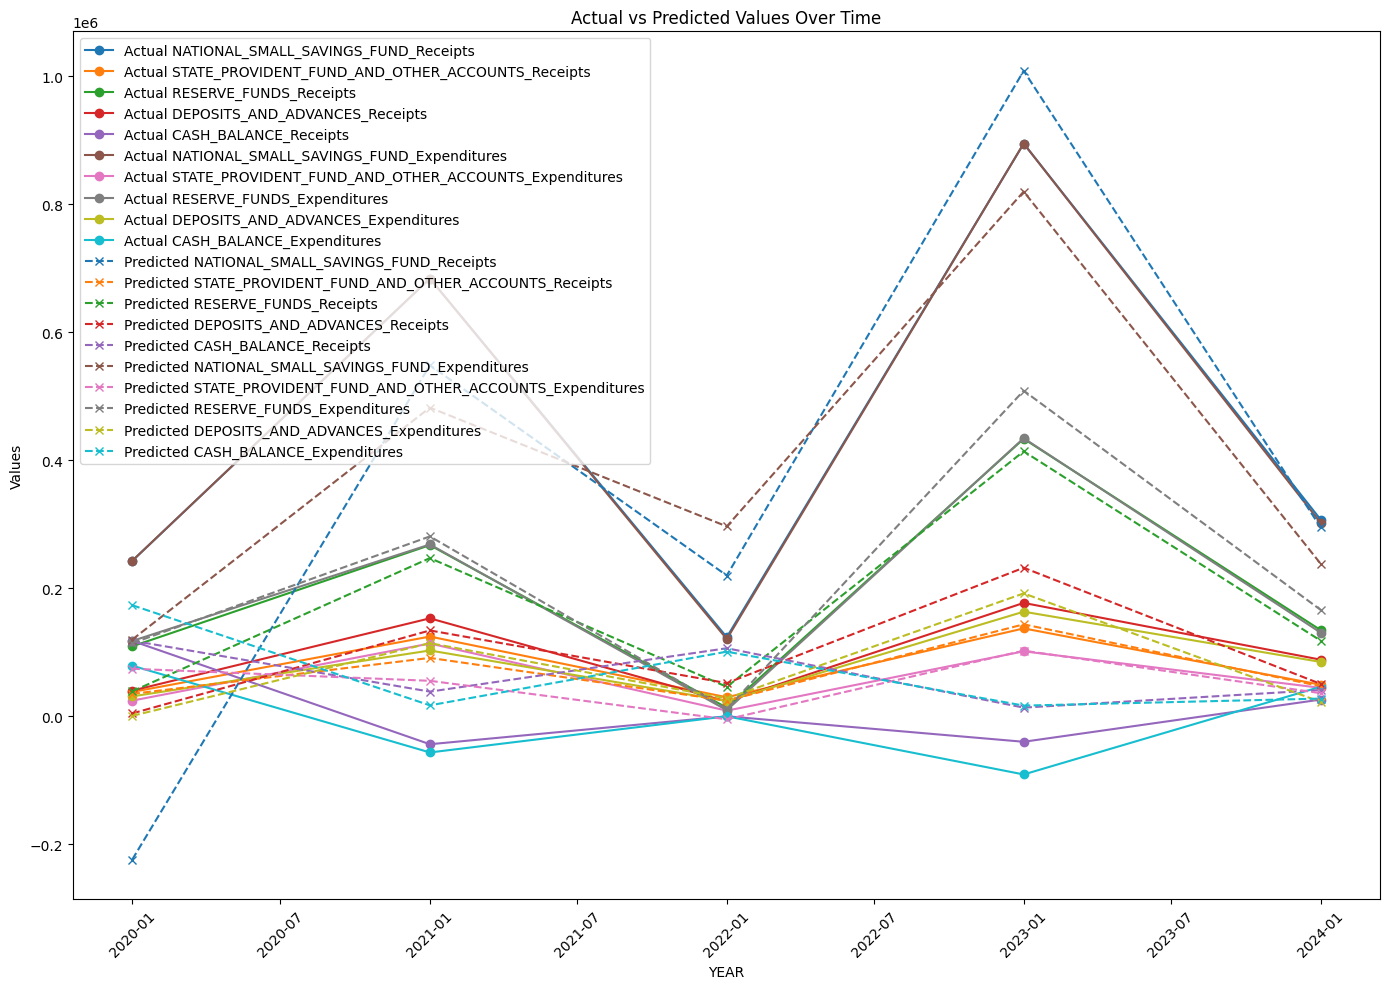

In [50]:
# Step 1: Plot each column from actual_df and predicted_df against Year
plt.figure(figsize=(14, 10))

# Plot actual values
for column in actual_df.columns:
    if column != 'YEAR':  # Skip the Year column
        plt.plot(actual_df['YEAR'], actual_df[column], label=f'Actual {column}', marker='o')

# Plot predicted values
for column in predicted_df.columns:
    if column != 'YEAR':  # Skip the Year column
        plt.plot(predicted_df['YEAR'], predicted_df[column], label=f'Predicted {column}', linestyle='--', marker='x')

# Step 2: Adding titles and legends
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('YEAR')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
print("Actual DataFrame Columns:", actual_df.columns)
print("Predicted DataFrame Columns:", predicted_df.columns)

Actual DataFrame Columns: Index(['YEAR', 'NATIONAL_SMALL_SAVINGS_FUND_Receipts',
       'STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts',
       'RESERVE_FUNDS_Receipts', 'DEPOSITS_AND_ADVANCES_Receipts',
       'CASH_BALANCE_Receipts', 'NATIONAL_SMALL_SAVINGS_FUND_Expenditures',
       'STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures',
       'RESERVE_FUNDS_Expenditures', 'DEPOSITS_AND_ADVANCES_Expenditures',
       'CASH_BALANCE_Expenditures'],
      dtype='object')
Predicted DataFrame Columns: Index(['YEAR', 'NATIONAL_SMALL_SAVINGS_FUND_Receipts',
       'STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts',
       'RESERVE_FUNDS_Receipts', 'DEPOSITS_AND_ADVANCES_Receipts',
       'CASH_BALANCE_Receipts', 'NATIONAL_SMALL_SAVINGS_FUND_Expenditures',
       'STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures',
       'RESERVE_FUNDS_Expenditures', 'DEPOSITS_AND_ADVANCES_Expenditures',
       'CASH_BALANCE_Expenditures'],
      dtype='object')


In [52]:
# Clean up the actual data frame by dropping the 'index' column
if 'index' in actual_df.columns:
    actual_df.drop(columns=['index'], inplace=True)

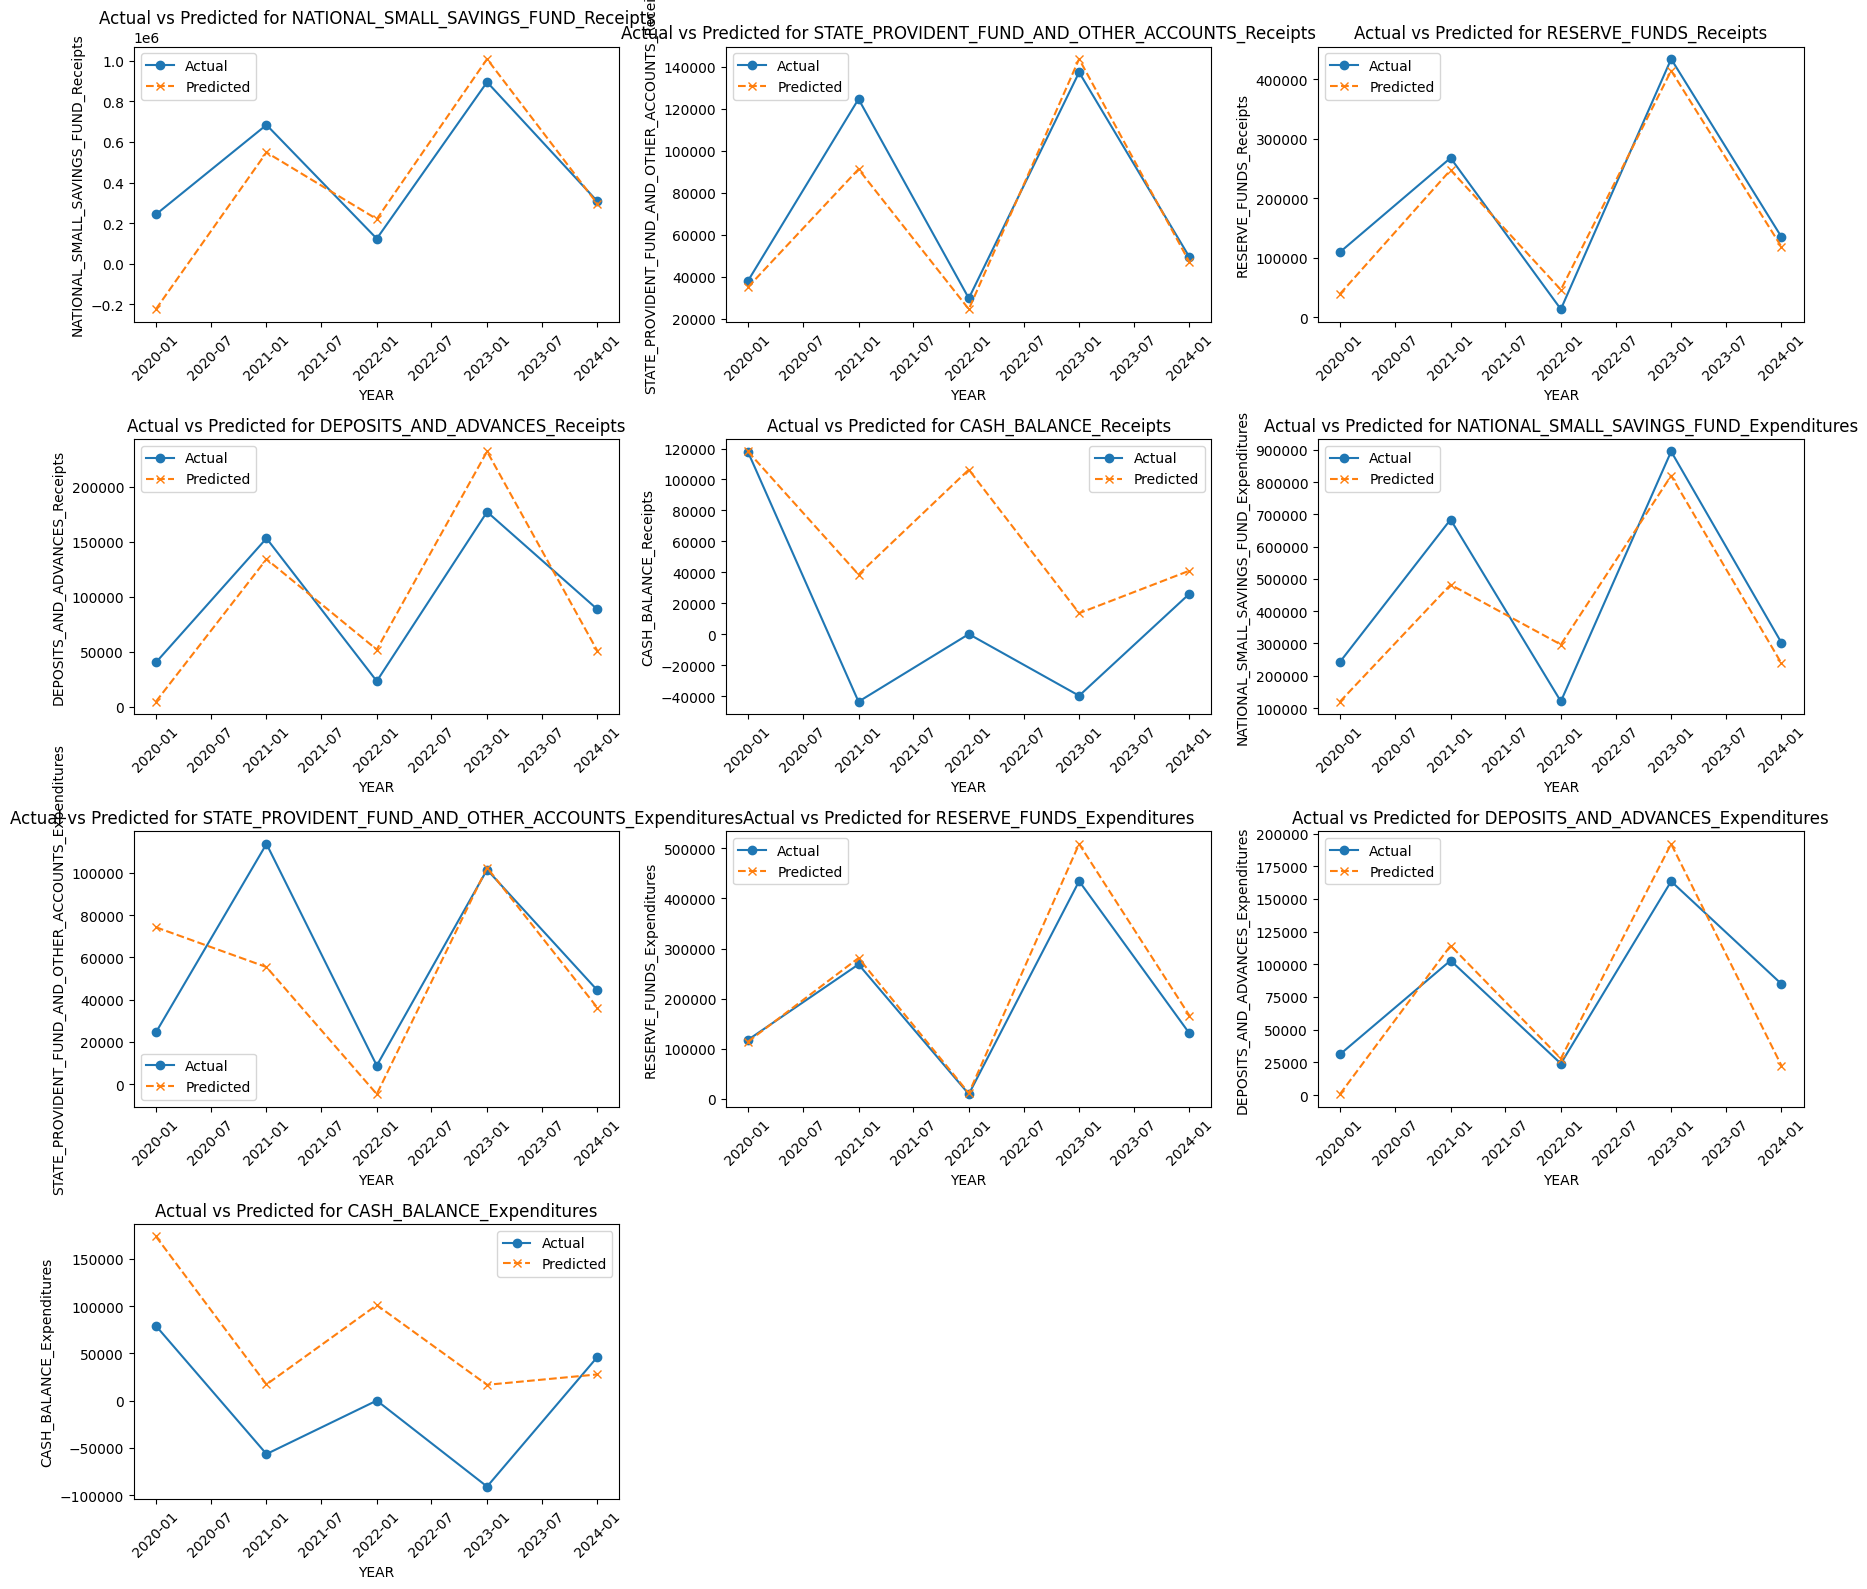

In [53]:
# Number of regions (excluding Year)
num_regions = len(actual_df.columns) - 1  # Excluding 'Year'

# Step 1: Set up the subplot arrangement
# Determine rows and columns based on the total number of regions
cols = 3  # Number of columns
rows = (num_regions // cols) + (num_regions % cols > 0)

plt.figure(figsize=(18, rows * 4))  # Adjust figure size according to your preference

# Step 2: Plot each column
for i, column in enumerate(actual_df.columns[1:]):  # Skip 'Year'
    plt.subplot(rows, cols, i + 1)  # Dynamic subplot specification
    plt.plot(actual_df['YEAR'], actual_df[column], label='Actual', marker='o')

    # Plot predicted values
    plt.plot(predicted_df['YEAR'], predicted_df[column], label='Predicted', linestyle='--', marker='x')

    # Title and labels
    plt.title(f'Actual vs Predicted for {column}')
    plt.xlabel('YEAR')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# LSTM model

In [54]:
from tensorflow.keras.layers import LSTM, Dense

In [55]:
# Build the LSTM model
model_LSTM = Sequential()
model_LSTM.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define the input shape with Input layer
model_LSTM.add(LSTM(50, activation='relu'))
model_LSTM.add(Dense(y_train.shape[1]))  # Output layer for each region's receipts/expenditures
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
# Compile the model
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model_LSTM.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,710 (49.65 KB)

 Trainable params: 12,710 (49.65 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model_LSTM.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1594
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1764 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1212 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0882 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0323 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0241 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

In [58]:
# Save the trained LSTM model
model_LSTM.save('model_lstm.h5')

In [59]:
model_RNN.save('model_rnn.h5')

In [ ]:
# Saving model and scaler

In [60]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['PUBLIC_scaler.pkl']

In [ ]:
# Inference

In [62]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

In [64]:
# Load the saved scaler and model
scaler = joblib.load('scaler.pkl')
lstm_model = load_model('model_lstm.h5')
rnn_model = load_model('model_rnn.h5')

In [66]:
df_org.head()

,YEAR,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures,TOTALPUBLIC_ACCOUNT_RECEIPTS (B+C+D+E),GRAND_TOTAL_IIIIII_Receipts,TOTAL_Receipts (F+M),TOTALPUBLIC_ACCOUNT_DISBURSEMENTS (G+H+I+J),GRAND_TOTAL_IIIIII_Expenditures,TOTAL_Expenditures (K+P)
0,1998-01-01,77091.43,77091.43,14717.12,28198.48,50.0,39446.22,39446.22,14063.48,25298.29,50.0,120007.03,796428.64,796478.64,77556.88,796428.64,796478.64
1,1999-01-01,89854.71,29933.90,16716.89,16078.15,50.0,262062.03,13068.21,17364.15,20600.46,50.0,152583.65,1057242.21,1057292.21,312118.89,1057242.21,1057292.21
2,2000-01-01,104990.30,26097.47,22704.11,19567.10,50.0,105433.70,9171.31,20780.84,13590.01,50.0,173358.98,950446.54,950496.54,148180.91,950446.54,950496.54
3,2001-01-01,123582.65,29753.43,13390.48,23133.55,50.0,120644.53,8833.79,9590.54,24049.57,50.0,189860.11,886928.55,886978.55,163118.43,886928.55,886978.55
4,2002-01-01,125813.67,36427.97,18601.19,16259.24,50.0,127248.27,14340.00,17561.20,12760.05,50.0,197102.07,977801.40,977851.40,171909.52,977801.40,977851.40


In [67]:
RAW_coulmns = 11

In [68]:
# Keep only the first 11 columns (0-indexed, so 0 to 10)
df = df_org.iloc[:, :RAW_coulmns]
df.head()

,YEAR,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures
0,1998-01-01,77091.43,77091.43,14717.12,28198.48,50.0,39446.22,39446.22,14063.48,25298.29,50.0
1,1999-01-01,89854.71,29933.90,16716.89,16078.15,50.0,262062.03,13068.21,17364.15,20600.46,50.0
2,2000-01-01,104990.30,26097.47,22704.11,19567.10,50.0,105433.70,9171.31,20780.84,13590.01,50.0
3,2001-01-01,123582.65,29753.43,13390.48,23133.55,50.0,120644.53,8833.79,9590.54,24049.57,50.0
4,2002-01-01,125813.67,36427.97,18601.19,16259.24,50.0,127248.27,14340.00,17561.20,12760.05,50.0


In [69]:

# Load dataset (Ensure Year column is datetime)
# df = pd.read_csv("your_data.csv")  # Change this to your actual file
df["YEAR"] = pd.to_datetime(df["YEAR"])

# Extract last available date
last_date = df["YEAR"].max()
print("Last Date in Dataset:", last_date)

Last Date in Dataset: 2024-01-01 00:00:00


In [70]:
# Extract numerical values (excluding "Year" column) and scale
data_values = df.drop(columns=["YEAR"]).values
scaled_data = scaler.transform(data_values)

In [71]:
# scaled_data

In [72]:
# Define sequence length and number of years to predict
seq_length = 3
num_years_to_predict = 1

In [73]:
# Get the last sequence from the scaled dataset
last_sequence = scaled_data[-seq_length:]  # Shape: (seq_length, features)
last_sequence

array([[0.71089593, 0.8416155 , 1.        , 0.84051733, 0.        ,
        0.71626444, 0.67085796, 1.        , 0.80219842, 0.        ],
       [0.83392247, 0.79005242, 0.67581386, 0.94915281, 0.40007024,
        0.83700644, 0.70880096, 0.64966784, 0.82122733, 0.40702747],
       [1.        , 0.92071941, 0.93775721, 0.76436477, 0.79132614,
        1.        , 1.        , 0.99117337, 0.90121411, 0.4479611 ]])

In [74]:
last_sequence = np.reshape(last_sequence, (1, seq_length, last_sequence.shape[1]))
last_sequence

array([[[0.71089593, 0.8416155 , 1.        , 0.84051733, 0.        ,
         0.71626444, 0.67085796, 1.        , 0.80219842, 0.        ],
        [0.83392247, 0.79005242, 0.67581386, 0.94915281, 0.40007024,
         0.83700644, 0.70880096, 0.64966784, 0.82122733, 0.40702747],
        [1.        , 0.92071941, 0.93775721, 0.76436477, 0.79132614,
         1.        , 1.        , 0.99117337, 0.90121411, 0.4479611 ]]])

In [75]:
# Store predictions
predictions_lstm = []
predictions_rnn = []
# Generate predictions for the next 'num_years_to_predict' years
for i in range(num_years_to_predict):
    next_prediction = lstm_model.predict(last_sequence)  # Predict next year
    predictions_lstm.append(next_prediction[0])  # Store prediction

    # Update last_sequence by removing the first value and appending the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, -1), axis=1)

for i in range(num_years_to_predict):
    next_prediction = rnn_model.predict(last_sequence)  # Predict next year
    predictions_rnn.append(next_prediction[0])  # Store prediction

    # Update last_sequence by removing the first value and appending the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, -1), axis=1)

# Convert predictions back to original scale
predictions_lstm = scaler.inverse_transform(predictions_lstm)
print('LSTM predictions')
print(predictions_lstm)

# Convert predictions back to original scale

predictions_rnn = scaler.inverse_transform(predictions_rnn)
print('RNN predictions')
print(predictions_rnn)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
LST predictions
[[2011300.03890945  182093.1058842   785368.80481238  294598.9925023
    95567.91999187 2147529.53047433  204186.88525817  818091.8986479
   279233.31894363  -20163.43193486]]
RNN predictions
[[1722985.35505892  145891.18832829  702873.04077218  228198.00507524
     6528.74853268 1927162.42350786  163469.91052911  756160.59124817
   194714.97370394 -101919.21358876]]


As we know form the loss while training, LOSS OF RNN IS LESS THAN LSTM

In [76]:
# Generate next year dates
future_dates = [last_date.replace(year=last_date.year + i ) for i in range(1, num_years_to_predict + 1)]

# Convert predictions into a DataFrame
predictions_df = pd.DataFrame(predictions_rnn, columns=df.columns[1:], index=future_dates)
predictions_df.reset_index(inplace=True)
predictions_df.rename(columns={"index": "YEAR"}, inplace=True)

# Append predictions to the original DataFrame
df_extended = pd.concat([df_org, predictions_df])

In [77]:

df_extended

,YEAR,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures,TOTALPUBLIC_ACCOUNT_RECEIPTS (B+C+D+E),GRAND_TOTAL_IIIIII_Receipts,TOTAL_Receipts (F+M),TOTALPUBLIC_ACCOUNT_DISBURSEMENTS (G+H+I+J),GRAND_TOTAL_IIIIII_Expenditures,TOTAL_Expenditures (K+P)
0,1998-01-01,7.709143e+04,77091.430000,14717.120000,28198.480000,50.000000,3.944622e+04,39446.220000,14063.480000,25298.290000,50.000000,120007.03,796428.64,796478.64,77556.88,796428.64,796478.64
1,1999-01-01,8.985471e+04,29933.900000,16716.890000,16078.150000,50.000000,2.620620e+05,13068.210000,17364.150000,20600.460000,50.000000,152583.65,1057242.21,1057292.21,312118.89,1057242.21,1057292.21
2,2000-01-01,1.049903e+05,26097.470000,22704.110000,19567.100000,50.000000,1.054337e+05,9171.310000,20780.840000,13590.010000,50.000000,173358.98,950446.54,950496.54,148180.91,950446.54,950496.54
3,2001-01-01,1.235826e+05,29753.430000,13390.480000,23133.550000,50.000000,1.206445e+05,8833.790000,9590.540000,24049.570000,50.000000,189860.11,886928.55,886978.55,163118.43,886928.55,886978.55
4,2002-01-01,1.258137e+05,36427.970000,18601.190000,16259.240000,50.000000,1.272483e+05,14340.000000,17561.200000,12760.050000,50.000000,197102.07,977801.40,977851.40,171909.52,977801.40,977851.40
5,2003-01-01,1.656077e+05,32424.140000,18783.520000,39571.930000,50.000000,1.680281e+05,11463.120000,19063.290000,24076.770000,50.000000,256387.26,1106118.59,1106168.59,222631.29,1106118.59,1106168.59
6,2004-01-01,2.087360e+05,20007.380000,19404.670000,46850.630000,13697.220000,2.019497e+05,5306.020000,19644.270000,40364.560000,60100.000000,294998.69,1216369.77,1230066.99,267264.54,1169966.99,1230066.99
7,2005-01-01,2.532693e+05,18933.040000,28251.600000,65196.220000,69120.510000,2.495465e+05,18221.340000,26209.080000,53399.670000,80550.000000,365650.12,1553636.56,1622757.07,347376.58,1542207.07,1622757.07
8,2006-01-01,2.719790e+05,22221.450000,36315.210000,37063.840000,27730.160000,2.713306e+05,15332.670000,34590.760000,26051.270000,73730.160000,367579.53,2145322.85,2173053.01,347305.26,2099322.85,2173053.01
9,2007-01-01,2.592468e+05,19572.900000,41739.600000,32599.220000,95500.000000,2.413971e+05,13600.950000,41001.640000,35009.920000,105500.000000,353158.52,2732471.41,2827971.41,331009.66,2722471.41,2827971.41


In [78]:

# Save the updated DataFrame
df_extended.to_excel("predicted_dataset.xlsx", index=False, engine='openpyxl')


In [79]:

# Print the updated DataFrame
df_extended.tail(num_years_to_predict + 5) # Show last few rows including predictions

,YEAR,NATIONAL_SMALL_SAVINGS_FUND_Receipts,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Receipts,RESERVE_FUNDS_Receipts,DEPOSITS_AND_ADVANCES_Receipts,CASH_BALANCE_Receipts,NATIONAL_SMALL_SAVINGS_FUND_Expenditures,STATE_PROVIDENT_FUND_AND_OTHER_ACCOUNTS_Expenditures,RESERVE_FUNDS_Expenditures,DEPOSITS_AND_ADVANCES_Expenditures,CASH_BALANCE_Expenditures,TOTALPUBLIC_ACCOUNT_RECEIPTS (B+C+D+E),GRAND_TOTAL_IIIIII_Receipts,TOTAL_Receipts (F+M),TOTALPUBLIC_ACCOUNT_DISBURSEMENTS (G+H+I+J),GRAND_TOTAL_IIIIII_Expenditures,TOTAL_Expenditures (K+P)
22,2020-01-01,1.171125e+06,128445.500000,493947.870000,253169.930000,2732.300000,1.171125e+06,108061.560000,490969.520000,217182.960000,55735.110000,2046688.75,12362010.24,12364742.54,1987339.49,12309007.43,12364742.54
23,2021-01-01,1.299005e+06,162633.910000,642014.150000,282664.980000,15116.810000,1.299005e+06,140041.350000,636962.870000,253797.000000,-56266.050000,2386318.29,13148679.48,13163796.29,2329806.47,13220062.34,13163796.29
24,2022-01-01,1.491500e+06,139873.920000,752089.430000,240149.000000,-169240.510000,1.491500e+06,131445.980000,746265.900000,206119.510000,-169992.250000,2623612.85,13939939.88,13770699.37,2575331.89,13940691.62,13770699.37
25,2023-01-01,1.736276e+06,132464.260000,512613.470000,269109.790000,5645.230000,1.736276e+06,138580.320000,488184.830000,210706.180000,17432.090000,2650463.46,16350706.21,16356351.44,2573747.26,16338919.35,16356351.44
26,2024-01-01,2.066706e+06,151241.220000,706110.750000,219847.730000,176677.890000,2.066706e+06,193333.840000,739763.540000,229985.950000,36280.840000,3143905.95,16189373.88,16366051.77,3229789.58,16329770.93,16366051.77
0,2025-01-01,1.722985e+06,145891.188328,702873.040772,228198.005075,6528.748533,1.927162e+06,163469.910529,756160.591248,194714.973704,-101919.213589,NaN,NaN,NaN,NaN,NaN,NaN
